## MOVIE RECOMMENDER SYSTEM - SHOWBOX

![Cover Tmdb](Cover_tmdb.jpg)

[Kaggle Dataset Here](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies = movies.merge(credits, on='title')

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [6]:
# genres, id, keywords, title, overview, cast, crew

movies = movies[['movie_id','title','genres','keywords','overview','cast','crew']]

In [7]:
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [8]:
movies.isnull().sum() # Finds null values in each column

movie_id    0
title       0
genres      0
keywords    0
overview    3
cast        0
crew        0
dtype: int64

In [9]:
# Remove null values
movies.dropna(inplace=True)
movies.isnull().sum()

movie_id    0
title       0
genres      0
keywords    0
overview    0
cast        0
crew        0
dtype: int64

In [10]:
# Finding duplicates
movies.duplicated().sum() # None

0

In [11]:
import ast

# Simplify genres
def genres_convert(obj):
    G = []
    obj = ast.literal_eval(obj)
    for i in obj:
        G.append(i['name'])
    return G

In [12]:
movies['genres'] = movies['genres'].apply(genres_convert)
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [13]:
# Simplify keywords

def keywords_convert(obj):
    K = []
    obj = ast.literal_eval(obj)
    for i in obj:
        K.append(i['name'])
    return K

In [14]:
movies['keywords'] = movies['keywords'].apply(keywords_convert)
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [15]:
# Simplify cast

def cast_convert(obj):
    C = []
    count = 0
    obj = ast.literal_eval(obj)
    for i in obj:
        if count == 3:
            break
        else:
            C.append(i['name'])
            count += 1
    return C

In [16]:
movies['cast'] = movies['cast'].apply(cast_convert)
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [17]:
# Simplify crew

def crew_convert(obj):
    C = []
    obj = ast.literal_eval(obj)
    for i in obj:
        # only director
        if i['job'] == 'Director':
            C.append(i['name'])
            break
    return C

In [18]:
movies['crew'] = movies['crew'].apply(crew_convert)
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [19]:
# Convert overview to list of words
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [20]:
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [21]:
# Removing spaces for easier tagging
movies['genres'] = movies['genres'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['cast'] = movies['cast'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['crew'] = movies['crew'].apply(lambda x: [i.replace(' ', '') for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x: [i.replace(' ', '') for i in x])

In [22]:
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [23]:
# Create a new column with tags

movies['tags'] = movies['overview'] + movies['keywords'] + movies['genres'] + movies['cast'] + movies['crew']

In [24]:
movies.head(2)

,movie_id,title,genres,keywords,overview,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."


In [25]:
# Dataframe with id title and tags

df = movies[['movie_id','title','tags']]

df.head(2)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."


In [26]:
# Convert list of tags to string
df['tags'] = df['tags'].apply(lambda x: ' '.join(x))

In [27]:
df['tags']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [28]:
df.head(2)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."


In [29]:
# Convert tags to lowercase
df['tags'] = df['tags'].apply(lambda x: x.lower())
df.head(2)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."


### WORD CLOUD

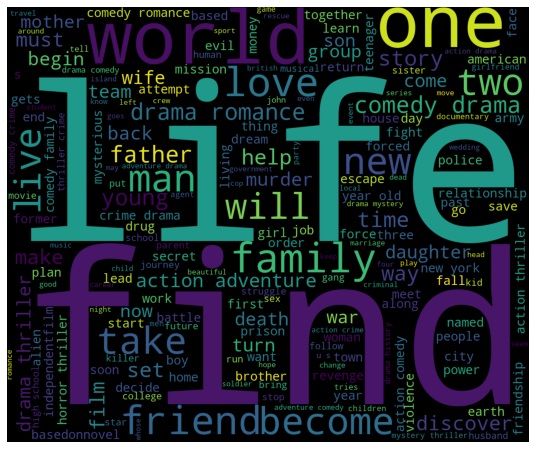

In [30]:
# Wordcloud

from wordcloud import WordCloud

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
wordcloud = WordCloud(background_color='black', width=1200, height=1000).generate(' '.join(df['tags']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
# Stemming

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [32]:
# Stemming tags

def stem(text):
    T = []
    for i in text.split():
        T.append(ps.stem(i))
    return T

In [33]:
df['tags'] = df['tags'].apply(stem)

In [34]:
df['tags']

0       [in, the, 22nd, century,, a, parapleg, marin, ...
1       [captain, barbossa,, long, believ, to, be, dea...
2       [a, cryptic, messag, from, bond’, past, send, ...
3       [follow, the, death, of, district, attorney, h...
4       [john, carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [el, mariachi, just, want, to, play, hi, guita...
4805    [a, newlyw, couple', honeymoon, is, upend, by,...
4806    ["signed,, sealed,, delivered", introduc, a, d...
4807    [when, ambiti, new, york, attorney, sam, is, s...
4808    [ever, sinc, the, second, grade, when, he, fir...
Name: tags, Length: 4806, dtype: object

In [35]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000, stop_words='english')

In [36]:
df['tags']

0       [in, the, 22nd, century,, a, parapleg, marin, ...
1       [captain, barbossa,, long, believ, to, be, dea...
2       [a, cryptic, messag, from, bond’, past, send, ...
3       [follow, the, death, of, district, attorney, h...
4       [john, carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [el, mariachi, just, want, to, play, hi, guita...
4805    [a, newlyw, couple', honeymoon, is, upend, by,...
4806    ["signed,, sealed,, delivered", introduc, a, d...
4807    [when, ambiti, new, york, attorney, sam, is, s...
4808    [ever, sinc, the, second, grade, when, he, fir...
Name: tags, Length: 4806, dtype: object

In [37]:
# List to string
df['tags'] = df['tags'].apply(lambda x: ' '.join(x))

In [38]:
# Fit the vectorizer to the data

vectors = cv.fit_transform(df['tags']).toarray()

In [39]:
vectors.shape

(4806, 5000)

In [40]:
# Display the vectors - 10 vectors
vectors[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### METRICS USED
---
* Euclidean Distance
* Cosine Similarity
* Hamming Distance
* Manhattan Distance

---

In [41]:
# Eucledian Distance
from sklearn.metrics.pairwise import euclidean_distances

distance1 = euclidean_distances(vectors)

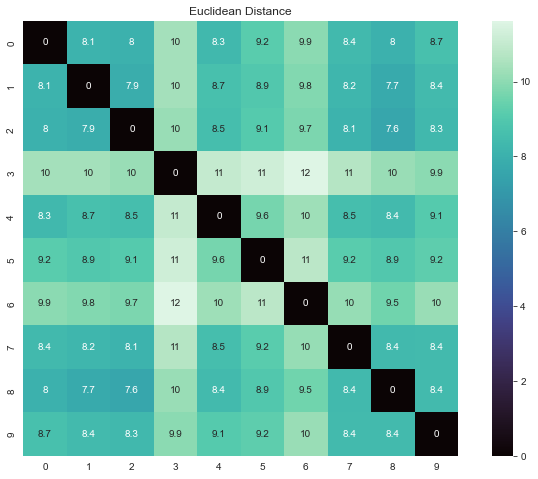

In [42]:
# Plotting the distance matrix - 10 values (Euclidean distance)
plt.figure(figsize=(12,8))
sns.heatmap(distance1[:10,:10], annot=True, square=True, cmap='mako')
plt.title('Euclidean Distance')
plt.show()

In [43]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity1 = cosine_similarity(vectors)

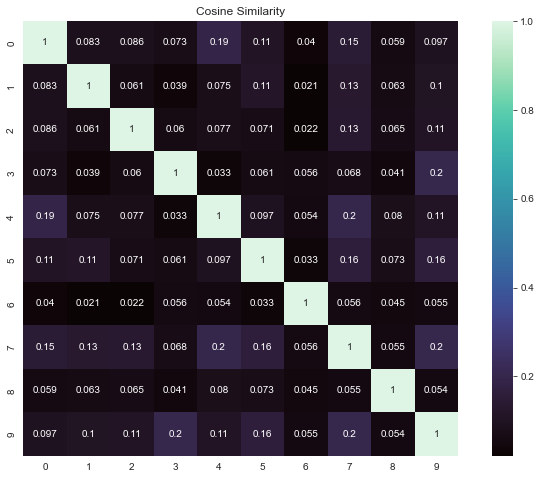

In [44]:
# Plotting the similarity matrix - 10 values (Cosine similarity)
plt.figure(figsize=(12,8))
sns.heatmap(similarity1[:10,:10], annot=True, square=True, cmap='mako')
plt.title('Cosine Similarity')
plt.show()

In [45]:
# Manhattan Distance

from sklearn.metrics.pairwise import manhattan_distances

distance2 = manhattan_distances(vectors)

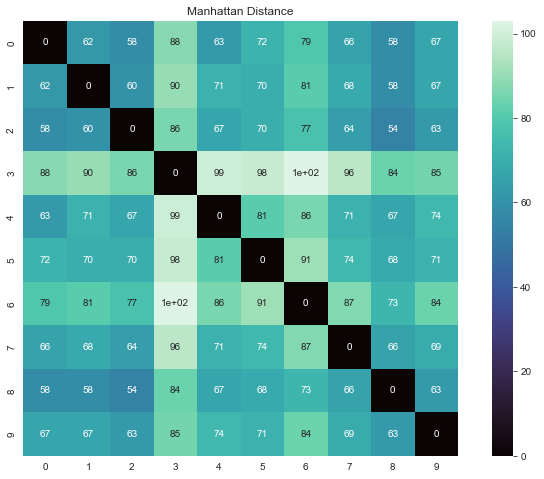

In [46]:
# Plotting the distance matrix - 10 values (manhattan distance)

plt.figure(figsize=(12,8))
sns.heatmap(distance2[:10,:10], annot=True, square=True, cmap='mako')
plt.title('Manhattan Distance')
plt.show()

In [47]:
# Hamming Distance

from sklearn.neighbors import DistanceMetric

distance3 = DistanceMetric.get_metric('hamming').pairwise(vectors)

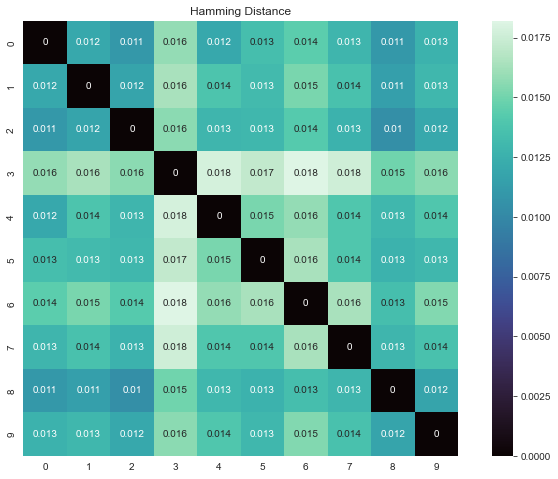

In [48]:
# Plotting the distance matrix - 10 values (hamming distance)

plt.figure(figsize=(12,8))
sns.heatmap(distance3[:10,:10], annot=True, square=True, cmap='mako')
plt.title('Hamming Distance')
plt.show()

In [49]:
# Return the index of top 5 similar movies - Cosine Similarity

def get_similar_cosine(movie):
    movie_index = df[df['title'] == movie].index[0]
    distances = similarity1[movie_index]
    movies_similar = sorted(enumerate(distances), key=lambda x: x[1], reverse=True)[1:6]
    
    for i in movies_similar:
        print(df['title'][i[0]])

In [60]:
# Return the index of top 5 similar movies - Euclidean Distance

def get_similar_euclidean(movie):
    movie_index = df[df['title'] == movie].index[0]
    distances = distance1[movie_index]
    movies_similar = sorted(enumerate(distances), key=lambda x: x[1])[1:6]
    
    for i in movies_similar:
        print(df['title'][i[0]])

In [61]:
# Return the index of top 5 similar movies - Manhattan Distance

def get_similar_manhattan(movie):
    movie_index = df[df['title'] == movie].index[0]
    distances = distance2[movie_index]
    movies_similar = sorted(enumerate(distances), key=lambda x: x[1])[1:6]
    
    for i in movies_similar:
        print(df['title'][i[0]])

In [62]:
# Return the index of top 5 similar movies - Hamming Distance

def get_similar_hamming(movie):
    movie_index = df[df['title'] == movie].index[0]
    distances = distance3[movie_index]
    movies_similar = sorted(enumerate(distances), key=lambda x: x[1])[1:6]
    
    for i in movies_similar:
        print(df['title'][i[0]])

In [63]:
get_similar_cosine("Pirates of the Caribbean: At World's End")

Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: The Curse of the Black Pearl
Pirates of the Caribbean: On Stranger Tides
Life of Pi
Monster


In [64]:
get_similar_euclidean("Pirates of the Caribbean: At World's End")

Special
Crossover
Ruby in Paradise
The Incredibly True Adventure of Two Girls In Love
Pirates of the Caribbean: Dead Man's Chest


In [65]:
get_similar_manhattan("Pirates of the Caribbean: At World's End")

Special
Crossover
Ruby in Paradise
The Incredibly True Adventure of Two Girls In Love
Pirates of the Caribbean: Dead Man's Chest


In [66]:
get_similar_hamming("Pirates of the Caribbean: At World's End")

Special
Crossover
Ruby in Paradise
The Incredibly True Adventure of Two Girls In Love
Pirates of the Caribbean: Dead Man's Chest


In [57]:
import pickle
# Dump the movie dataframe to a pickle file as a dictionary
pickle.dump(df.to_dict(), open('movies_dict.pkl', 'wb'))
# Dump the similarity_matrix to a pickle file
pickle.dump(similarity1, open('similarity.pkl', 'wb'))